<a href="https://colab.research.google.com/github/tontantip/DADS6001-Applied-statistics/blob/main/in%20class/anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Starting salary of graduated college students

In [ ]:
salary<-c(17.4,16.5,17.2,16.9,17.5,16.8,17.4,17.6,18.2,15.6,13.5,16.3,15.2)
uni <- c(rep("1",4), rep("2",5), rep("3",4))
my.dat <- data.frame(salary,uni)
with(my.dat, shapiro.test(salary[uni=="1"]))


	Shapiro-Wilk normality test

data:  salary[uni == "1"]
W = 0.97133, p-value = 0.8497


In [ ]:
my.dat

salary,uni
<dbl>,<chr>
17.4,1
16.5,1
17.2,1
16.9,1
17.5,2
16.8,2
17.4,2
17.6,2
18.2,2


In [ ]:
with(my.dat, shapiro.test(salary[uni=="2"]))


	Shapiro-Wilk normality test

data:  salary[uni == "2"]
W = 0.95798, p-value = 0.7939


In [ ]:
with(my.dat, shapiro.test(salary[uni=="3"]))


	Shapiro-Wilk normality test

data:  salary[uni == "3"]
W = 0.93261, p-value = 0.6098


In [ ]:

##install.packages("car")

ERROR: Error in parse(text = input): <text>:1:1: unexpected SPECIAL
1: %%
    ^


In [ ]:
aov.model <- aov(salary ~ uni)
library(car)
leveneTest(aov.model ,center=mean)

ERROR: Error in library(car): there is no package called ‘car’


## EX1

In [ ]:
bac<-c(51,5,19,18,58,50,82,17,70,164,88,111,73,119,20,95,84,51,110,67,119,108,207,102,74,135,102,124,105,130,170,87)
uni <- c(rep("ALS",8), rep("AS",8), rep("S",8),rep("W",8))
my.dat <- data.frame(bac,uni)
with(my.dat                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             , shapiro.test(bac[uni=="ALS"]))
with(my.dat, shapiro.test(bac[uni=="AS"]))
with(my.dat, shapiro.test(bac[uni=="S"]))
with(my.dat, shapiro.test(bac[uni=="W"]))


	Shapiro-Wilk normality test

data:  bac[uni == "ALS"]
W = 0.91146, p-value = 0.3644



	Shapiro-Wilk normality test

data:  bac[uni == "AS"]
W = 0.97591, p-value = 0.9399



	Shapiro-Wilk normality test

data:  bac[uni == "S"]
W = 0.86766, p-value = 0.143



	Shapiro-Wilk normality test

data:  bac[uni == "W"]
W = 0.97226, p-value = 0.9151


In [ ]:

aov.model <- aov(bac ~ uni)
library(car)
leveneTest(aov.model ,center=mean)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,0.2018333,0.8942386
,28,NA,NA


In [ ]:
summary(aov.model)

            Df Sum Sq Mean Sq F value  Pr(>F)   
uni          3  29372    9791   7.001 0.00117 **
Residuals   28  39159    1399                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

##Tukey


In [ ]:
TukeyHSD(aov.model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = bac ~ uni)

$uni
         diff        lwr       upr     p adj
AS-ALS 55.000   3.947349 106.05265 0.0310857
S-ALS  68.500  17.447349 119.55265 0.0053573
W-ALS  78.375  27.322349 129.42765 0.0013571
S-AS   13.500 -37.552651  64.55265 0.8874937
W-AS   23.375 -27.677651  74.42765 0.6011987
W-S     9.875 -41.177651  60.92765 0.9515365


In [ ]:
## q tukey
qtukey(0.95,4,28)
## HSD
qtukey(0.95,4,28)*sqrt(1398.53/8)

[1] 3.861244

[1] 51.05263

In [ ]:
#install.packages("agricolae")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘AlgDesign’




In [ ]:
library(agricolae)
duncan.test(aov.model,"uni",alpha=0.05,console=TRUE)



Study: aov.model ~ "uni"

Duncan's new multiple range test
for bac 

Mean Square Error:  1398.531 

uni,  means

        bac      std r       se Min Max   Q25   Q50    Q75
ALS  37.500 26.55991 8 13.22182   5  82 17.75  34.5  52.75
AS   92.500 41.96257 8 13.22182  20 164 72.25  91.5 113.00
S   106.000 46.95895 8 13.22182  51 207 79.75 105.0 112.25
W   115.875 30.37592 8 13.22182  74 170 98.25 114.5 131.25

Alpha: 0.05 ; DF Error: 28 

Critical Range
       2        3        4 
38.30208 40.24518 41.50141 

Means with the same letter are not significantly different.

        bac groups
W   115.875      a
S   106.000      a
AS   92.500      a
ALS  37.500      b


## 2 way


In [ ]:
absent <-
c(3.0,4.5,4.0,5.0,4.5,4.0,2.5,3.0,3.5,2.0,2.0,3.0,2.0,2.5,2.0,1.0,3.0,2.5,1.0,3.0,1.5,5.0,4.0,2.5,2.5,1.0,1.5,0.0,1.5,2.0
,3.5,3.5,4.0,4.0,4.5,5.0)

In [ ]:
#install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
dept <- as.factor(c(rep("Warehouse",3), rep("Commow",3), rep("Bigw",3), rep("Refrigw",3)))
train <- as.factor(c(rep("1-20",12), rep("21-50",12), rep(">50",12)))
mdataframe <- data.frame(absent,dept,train)
library(car)
leveneTest(absent ~ dept * train, data=mdataframe ,center=mean)

Loading required package: carData



,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,11,1.390509,0.2399123
,24,NA,NA


In [ ]:
aov.model <- aov(absent ~ dept * train, data = mdataframe)
summary(aov.model)

            Df Sum Sq Mean Sq F value   Pr(>F)    
dept         3   5.72   1.907   3.157   0.0432 *  
train        2   5.39   2.694   4.460   0.0225 *  
dept:train   6  32.44   5.407   8.950 3.51e-05 ***
Residuals   24  14.50   0.604                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
model.tables(aov.model, type="means")

Tables of means
Grand mean
         
2.888889 

 dept 
dept
     Bigw    Commow   Refrigw Warehouse 
    2.833     2.611     3.556     2.556 

 train 
train
  >50  1-20 21-50 
2.750 3.417 2.500 

 dept:train 
           train
dept        >50   1-20  21-50
  Bigw      3.667 3.000 1.833
  Commow    1.167 4.500 2.167
  Refrigw   4.500 2.333 3.833
  Warehouse 1.667 3.833 2.167

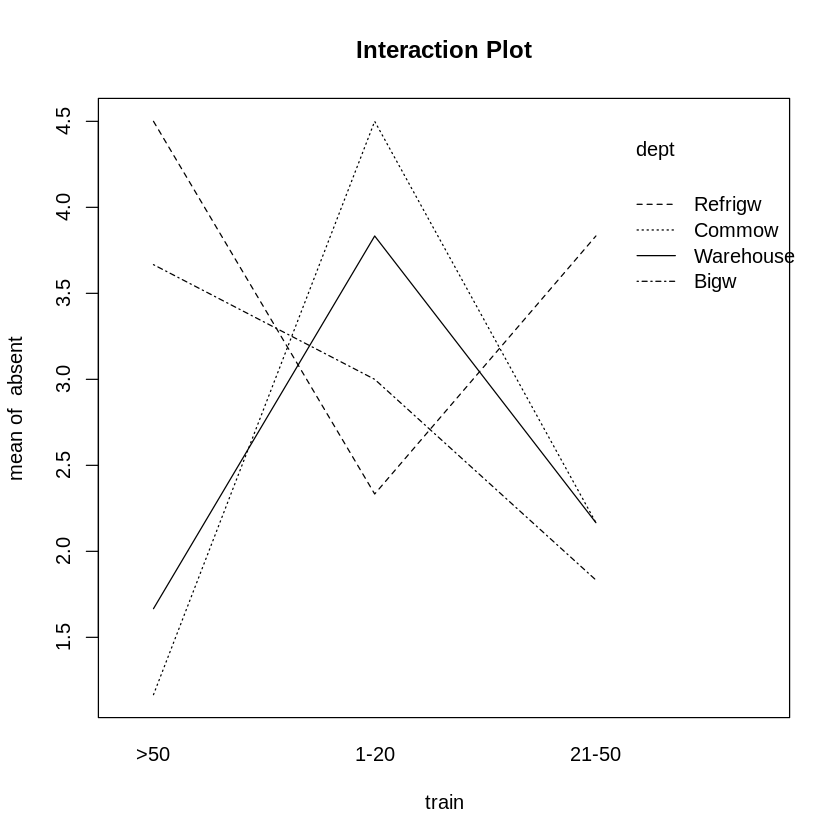

In [ ]:
with(mdataframe, interaction.plot(train, dept, absent, fun = mean, main = "Interaction Plot"))

In [ ]:
TukeyHSD(aov.model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = absent ~ dept * train, data = mdataframe)

$dept
                         diff         lwr        upr     p adj
Commow-Bigw       -0.22222222 -1.23301525 0.78857081 0.9290208
Refrigw-Bigw       0.72222222 -0.28857081 1.73301525 0.2266365
Warehouse-Bigw    -0.27777778 -1.28857081 0.73301525 0.8723064
Refrigw-Commow     0.94444444 -0.06634859 1.95523747 0.0730084
Warehouse-Commow  -0.05555556 -1.06634859 0.95523747 0.9987219
Warehouse-Refrigw -1.00000000 -2.01079303 0.01079303 0.0532315

$train
                 diff        lwr        upr     p adj
1-20->50    0.6666667 -0.1257822  1.4591155 0.1108484
21-50->50  -0.2500000 -1.0424488  0.5424488 0.7139374
21-50-1-20 -0.9166667 -1.7091155 -0.1242178 0.0212277

$`dept:train`
                                        diff        lwr         upr     p adj
Commow:>50-Bigw:>50            -2.500000e+00 -4.7883045 -0.21169548 0.0239121
Refrigw:>50-Bigw:>50

## Ex in class

In [ ]:
data <-
c(115,98,107,90,85,90,118,105,98,92,95,81,100,15,95,70,85,78,105,95,98,80,68,82,89,100,90,65,80,72,78,85,95,62,70,73)

In [ ]:
dept <- as.factor(c(rep("",2), rep("moderate",2), rep("severe",2)))
train <- as.factor(c(rep("1-20",12), rep("21-50",12), rep(">50",12)))
mdataframe <- data.frame(absent,dept,train)
library(car)
leveneTest(absent ~ dept * train, data=mdataframe ,center=mean)

In [ ]:

library(tidyverse)

# 1. สร้างเวกเตอร์สำหรับตัวแปรอิสระ (Factors)
Group <- factor(c(rep("Treatment", 9), rep("Control", 9)))
D_Disable <- factor(rep(c(rep("Mild", 3), rep("Moderate", 3), rep("Severe", 3)), 2),
                    levels = c("Mild", "Moderate", "Severe")) # กำหนดลำดับระดับ

# 2. สร้างเวกเตอร์สำหรับตัวแปรตาม (Dependent Variable)
WRAT_R <- c(115, 98, 107, 100, 105, 95, 89, 100, 90, # Treatment 9 obs
            90, 85, 90, 70, 85, 78, 65, 80, 72) # Control 9 obs

WRAT_A <- c(118, 105, 98, 105, 95, 98, 78, 85, 95,
            92, 95, 81, 80, 68, 82, 62, 70, 73)

IQ <- c(110, 102, 100, 115, 98, 100, 99, 102, 100,
        108, 115, 95, 100, 99, 105, 101, 95, 102)

# 3. รวมเป็น Data Frame
my_data <- data.frame(WRAT_R, WRAT_A, IQ, Group, D_Disable)

# 4. ตรวจสอบโครงสร้าง
str(my_data)

'data.frame':	18 obs. of  5 variables:
 $ WRAT_R   : num  115 98 107 100 105 95 89 100 90 90 ...
 $ WRAT_A   : num  118 105 98 105 95 98 78 85 95 92 ...
 $ IQ       : num  110 102 100 115 98 100 99 102 100 108 ...
 $ Group    : Factor w/ 2 levels "Control","Treatment": 2 2 2 2 2 2 2 2 2 1 ...
 $ D_Disable: Factor w/ 3 levels "Mild","Moderate",..: 1 1 1 2 2 2 3 3 3 1 ...


In [ ]:

aov_wrat_r <- aov(WRAT_R ~ Group * D_Disable, data = my_data)


summary(aov_wrat_r)



                Df Sum Sq Mean Sq F value   Pr(>F)    
Group            1 1880.9  1880.9  44.198 2.37e-05 ***
D_Disable        2  666.3   333.2   7.829  0.00667 ** 
Group:D_Disable  2   12.1     6.1   0.142  0.86881    
Residuals       12  510.7    42.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
model.tables(aov_wrat_r, type="means")

Tables of means
Grand mean
         
89.66667 

 Group 
Group
  Control Treatment 
    79.44     99.89 

 D_Disable 
D_Disable
    Mild Moderate   Severe 
   97.50    88.83    82.67 

 Group:D_Disable 
           D_Disable
Group       Mild   Moderate Severe
  Control    88.33  77.67    72.33
  Treatment 106.67 100.00    93.00

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.defaul

ERROR: Error in plot.window(...): need finite 'ylim' values


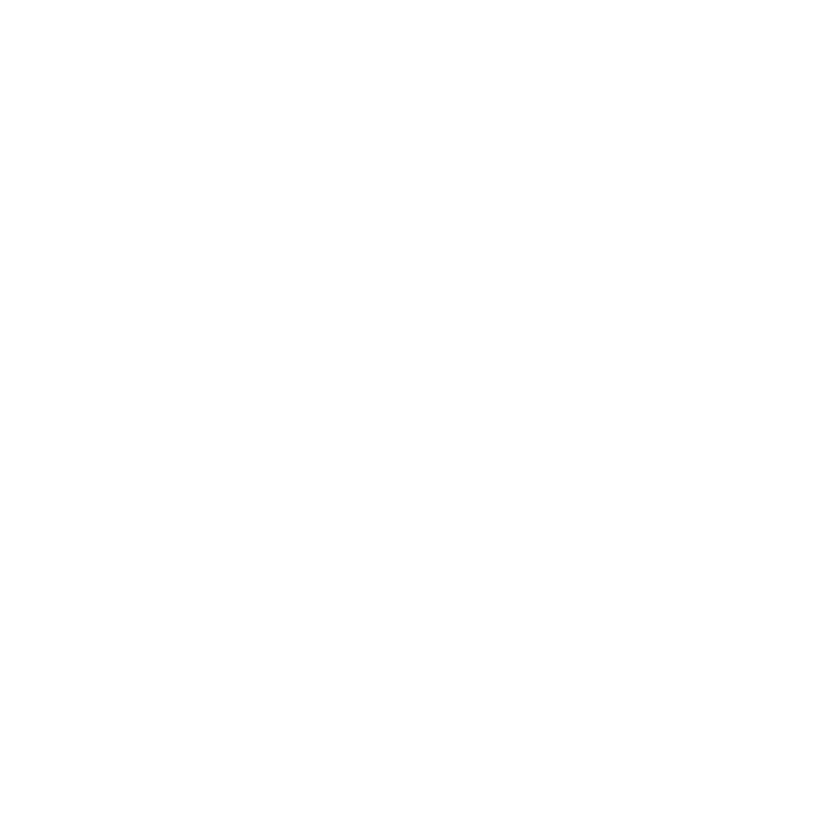

In [ ]:
with(mdataframe, interaction.plot(WRAT_R, WRAT_A, D_Disable, fun = mean, main = "Interaction Plot"))

In [ ]:

aov_wrat_a <- aov(WRAT_A ~ Group * D_Disable, data = my_data)


summary(aov_wrat_a)

                Df Sum Sq Mean Sq F value   Pr(>F)    
Group            1 1682.0  1682.0  29.140 0.000161 ***
D_Disable        2 1323.4   661.7  11.464 0.001645 ** 
Group:D_Disable  2   25.0    12.5   0.217 0.808368    
Residuals       12  692.7    57.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Friendlyness


In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
library(reshape2)
user.friend <- data.frame( sys = c("A", "B", "C"), AG1 = c(6.5,7.5,8.0), AG2 = c(7.0,7.0,8.5), AG3 =
c(6.0,7.5,8.0), AG4 = c(7.5,8.0,8.0), AG5 = c(7.0,7.0,7.5), AG6 = c(6.5,8.0,7.5), AG7 = c(7.0,7.5,7.0), AG8 =
c(6.5,7.0,6.0))
muser.friend<- melt(user.friend, id.var="sys")
library(car)
leveneTest(value ~ variable, muser.friend ,center=mean)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,7,1.939394,0.1291016
,16,NA,NA


In [ ]:
aov.model<- aov(value ~ sys + variable, data=muser.friend)
summary(aov.model)


            Df Sum Sq Mean Sq F value Pr(>F)  
sys          2  3.062  1.5312   5.444 0.0178 *
variable     7  3.000  0.4286   1.524 0.2376  
Residuals   14  3.937  0.2812                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
TukeyHSD(aov.model)


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ sys + variable, data = muser.friend)

$sys
      diff          lwr       upr     p adj
B-A 0.6875 -0.006511295 1.3815113 0.0523217
C-A 0.8125  0.118488705 1.5065113 0.0215058
C-B 0.1250 -0.569011295 0.8190113 0.8856846

$variable
                 diff       lwr       upr     p adj
AG2-AG1  1.666667e-01 -1.361292 1.6946253 0.9999048
AG3-AG1 -1.666667e-01 -1.694625 1.3612920 0.9999048
AG4-AG1  5.000000e-01 -1.027959 2.0279586 0.9323510
AG5-AG1 -1.666667e-01 -1.694625 1.3612920 0.9999048
AG6-AG1 -3.552714e-15 -1.527959 1.5279586 1.0000000
AG7-AG1 -1.666667e-01 -1.694625 1.3612920 0.9999048
AG8-AG1 -8.333333e-01 -2.361292 0.6946253 0.5574112
AG3-AG2 -3.333333e-01 -1.861292 1.1946253 0.9922344
AG4-AG2  3.333333e-01 -1.194625 1.8612920 0.9922344
AG5-AG2 -3.333333e-01 -1.861292 1.1946253 0.9922344
AG6-AG2 -1.666667e-01 -1.694625 1.3612920 0.9999048
AG7-AG2 -3.333333e-01 -1.861292 1.1946253 0

In [ ]:
# ข้อมูลการลดลงของความดันโลหิตสำหรับยาแต่ละชนิด
Drug_A <- c(10, 12, 11, 9, 13)
Drug_B <- c(15, 17, 14, 16, 18)
Drug_C <- c(8, 7, 9, 6, 10)

# สร้าง Factor Variable (ตัวแปรกลุ่ม)
Drug <- factor(c(
    rep("A", length(Drug_A)),
    rep("B", length(Drug_B)),
    rep("C", length(Drug_C))
))

# สร้าง Dependent Variable (ตัวแปรตาม)
BP_Decrease <- c(Drug_A, Drug_B, Drug_C)

# สร้าง DataFrame
data_anova <- data.frame(BP_Decrease, Drug)

print("โครงสร้างข้อมูล:")
print(data_anova)

[1] "โครงสร้างข้อมูล:"
   BP_Decrease Drug
1           10    A
2           12    A
3           11    A
4            9    A
5           13    A
6           15    B
7           17    B
8           14    B
9           16    B
10          18    B
11           8    C
12           7    C
13           9    C
14           6    C
15          10    C


In [ ]:
u_1 <- c(17.4,16.5,17.2,16.9)
u_2 <- c(17.5,16.8,17.4,17.6,18.2)
u_3 <- c(15.6,13.5,16.3,15.2)

univer <- factor(c( # Corrected typo here
    rep("u_1",length(u_1)),
    rep("u_2",length(u_2)),
    rep("u_3",length(u_3))
))

salary <- c(u_1,u_2,u_3)

data <- data.frame(salary,univer)

data

salary,univer
<dbl>,<fct>
17.4,u_1
16.5,u_1
17.2,u_1
16.9,u_1
17.5,u_2
16.8,u_2
17.4,u_2
17.6,u_2
18.2,u_2


In [ ]:
anova_model <- aov(salary ~ univer, data = data_anova)
summary(anova_model)

            Df Sum Sq Mean Sq F value  Pr(>F)   
univer       2  13.09   6.547   11.46 0.00258 **
Residuals   10   5.71   0.571                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
u_1 <- c(17.4,16.5,17.2,16.9)
u_2 <- c(17.5,16.8,17.4,17.6,18.2)
u_3 <- c(15.6,13.5,16.3,15.2)

uniname <- factor(c(
    rep("uni1",length(u_1)),
    rep("uni2",length(u_2)),
    rep("uni3",length(u_3))

))
salary <- c(u_1,u_2,u_3)
data <- data.frame(salary,uniname)
data

salary,uniname
<dbl>,<fct>
17.4,uni1
16.5,uni1
17.2,uni1
16.9,uni1
17.5,uni2
16.8,uni2
17.4,uni2
17.6,uni2
18.2,uni2


In [ ]:
anova_model <- aov(salary ~ uniname, data = data_anova)
summary(anova_model)

            Df Sum Sq Mean Sq F value  Pr(>F)   
uniname      2  13.09   6.547   11.46 0.00258 **
Residuals   10   5.71   0.571                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
qf(p = 0.95, df1 = 2, df2 = 14)

[1] 3.738892

In [ ]:
TukeyHSD(anova_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = salary ~ uniname, data = data_anova)

$uniname
           diff       lwr        upr     p adj
uni2-uni1  0.50 -0.889569  1.8895690 0.6014064
uni3-uni1 -1.85 -3.314734 -0.3852657 0.0153361
uni3-uni2 -2.35 -3.739569 -0.9604310 0.0024222


In [ ]:
als <- c(51,5,19,18,58,50,82,17)
as <- c(70,164,88,111,73,119,20,95)
s <- c(84,51,110,67,119,108,207,102)
w <- c(74,135,102,124,105,130,170,87)

name <- factor(c(rep("als",length(als)),
rep("as",length(as)),
rep("s",length(s)), rep("w",length(w))))

amount <- c(als,as,s,w)

data_table <- data.frame(amount,name)
data_table

amount,name
<dbl>,<fct>
51,als
5,als
19,als
18,als
58,als
50,als
82,als
17,als
70,as


In [ ]:
anova_model <- aov(amount ~ name, data = data_anova)
summary(anova_model)

            Df Sum Sq Mean Sq F value  Pr(>F)   
name         3  29372    9791   7.001 0.00117 **
Residuals   28  39159    1399                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
TukeyHSD(anova_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = amount ~ name, data = data_anova)

$name
         diff        lwr       upr     p adj
as-als 55.000   3.947349 106.05265 0.0310857
s-als  68.500  17.447349 119.55265 0.0053573
w-als  78.375  27.322349 129.42765 0.0013571
s-as   13.500 -37.552651  64.55265 0.8874937
w-as   23.375 -27.677651  74.42765 0.6011987
w-s     9.875 -41.177651  60.92765 0.9515365


In [ ]:
qf(p = 0.95, df1 = 3 , df2 = 28)

[1] 2.946685

test of independent and cramerV

In [ ]:
install.packages("rcompanion")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘TH.data’, ‘sandwich’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘multcomp’, ‘zoo’, ‘DescTools’, ‘multcompView’, ‘plyr’, ‘coin’, ‘lmtest’, ‘nortest’




In [ ]:
data_table <- matrix(c(20,68,5,15,94,7,16,10,84,119,29,54,17,26,14,14), nrow = 4)
colnames(data_table) = c("black", "blonde", "brown","red")

chisq.test(data_table)

library(rcompanion)
cramerV(data_table)



	Pearson's Chi-squared test

data:  data_table
X-squared = 138.29, df = 9, p-value < 2.2e-16


Cramer V 
   0.279

In [ ]:
american <- c(14.15,14.30,14.85,14.60,14.25,15.10,14.65,14.45)
thai <- c(14.85,13.65,13.45,14.20,12.65,14.35,13.50,12.80)
chiness <- c(14.15,13.90,13.65,13.60,13.20,13.20,14.05,13.80)

name <- factor(c(rep("american",length(american)),rep("thai",length(thai)),rep("chiness",length(chiness))))

hd <- c(american,thai,chiness)
data_table <- data.frame(hd,name)
data_table

hd,name
<dbl>,<fct>
14.15,american
14.30,american
14.85,american
14.60,american
14.25,american
15.10,american
14.65,american
14.45,american
14.85,thai


In [ ]:
anova_model <- aov(hd~name , data = data_anova)
summary(anova_model)

            Df Sum Sq Mean Sq F value  Pr(>F)   
name         2  3.911  1.9554   7.301 0.00391 **
Residuals   21  5.624  0.2678                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
qf(p = 0.95, df1=2,df2=21)

[1] 3.4668

In [ ]:
TukeyHSD(anova_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = hd ~ name, data = data_anova)

$name
                    diff        lwr        upr     p adj
chiness-american -0.8500 -1.5022052 -0.1977948 0.0094763
thai-american    -0.8625 -1.5147052 -0.2102948 0.0084895
thai-chiness     -0.0125 -0.6647052  0.6397052 0.9987143


In [ ]:
## prepare data table
u_1 <- c(17.4,16.5,17.2,16.9)
u_2 <- c(17.5,16.8,17.4,17.6,18.2)
u_3 <- c(15.6,13.5,16.3,15.2)

name_uni <- factor(c(rep("uni_1",length(u_1)),rep("uni_2",length(u_2)),rep("uni_3",length(u_3))))

salary <- c(u_1,u_2,u_3)

data_table <- data.frame(name_uni,salary)

## create model
anova_model <- aov(salary ~ name_uni)
summary(anova_model)

## TukeyHSD
TukeyHSD(anova_model)


            Df Sum Sq Mean Sq F value  Pr(>F)   
name_uni     2  13.09   6.547   11.46 0.00258 **
Residuals   10   5.71   0.571                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = salary ~ name_uni)

$name_uni
             diff       lwr        upr     p adj
uni_2-uni_1  0.50 -0.889569  1.8895690 0.6014064
uni_3-uni_1 -1.85 -3.314734 -0.3852657 0.0153361
uni_3-uni_2 -2.35 -3.739569 -0.9604310 0.0024222


In [ ]:
qf(p = 0.95, df1 = 2 , df2 = 10)

[1] 4.102821

In [ ]:
## TukeyHSD
TukeyHSD(anova_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = salary ~ name_uni)

$name_uni
             diff       lwr        upr     p adj
uni_2-uni_1  0.50 -0.889569  1.8895690 0.6014064
uni_3-uni_1 -1.85 -3.314734 -0.3852657 0.0153361
uni_3-uni_2 -2.35 -3.739569 -0.9604310 0.0024222


In [ ]:
m_a <- c(14,12,10,10,9,6,5)
m_b <- c(17,15,12,9,9,7,7)
m_c <- c(14,11,10,10,8,7,7)
m_d <- c(8,6,5,4,2,2,2)

name <- factor(c(rep("m_a",length(m_a)),rep("m_b",length(m_b)),rep("m_c",length(m_c)),rep("m_d",length(m_d))))
score <- c(m_a,m_b,m_c,m_d)
data_table <- data.frame(name,score)
anova_model <- aov(score ~ name)
summary(anova_model)

TukeyHSD(anova_model)

            Df Sum Sq Mean Sq F value  Pr(>F)   
name         3  185.9   61.95   6.663 0.00197 **
Residuals   24  223.1    9.30                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = score ~ name)

$name
              diff        lwr        upr     p adj
m_b-m_a  1.4285714  -3.067591  5.9247336 0.8168978
m_c-m_a  0.1428571  -4.353305  4.6390193 0.9997515
m_d-m_a -5.2857143  -9.781876 -0.7895521 0.0169960
m_c-m_b -1.2857143  -5.781876  3.2104479 0.8587799
m_d-m_b -6.7142857 -11.210448 -2.2181235 0.0020632
m_d-m_c -5.4285714  -9.924734 -0.9324093 0.0138658


In [ ]:
m_a <- c(14,12,10,10,9,6,5)
m_b <- c(17,15,12,9,9,7,7)
m_c <- c(14,11,10,10,8,7,7)
m_d <- c(8,6,5,4,2,2,2)

ืname <- factor(c(rep("m_a",length(m_a)),rep("m_b",length(m_b)),rep("m_c",length(m_c)),rep("m_d",length(m_d))))
name

ERROR: Error: object 'name' not found


In [ ]:
qf(p = 0.95, df1 = 3, df2 = 24)

[1] 3.008787

In [1]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [4]:
data <- c(3,4.5,4,5,4.5,4,2.5,3,3.5,2,2,3,
          2,2.5,2,1,3,2.5,1,3,1.5,5,4,2.5,
          2.5,1,1.5,0,1.5,2,3.5,3.5,4,4,4.5,5)

depar <- factor(c(rep("a",3),rep("b",3),rep("c",3),rep("d",3)))

train <- factor(c(rep("1-20",12),rep("21-50",12),rep(">50",12)))

data_table <- data.frame(depar,train,data)

data_table

depar,train,data
<fct>,<fct>,<dbl>
a,1-20,3.0
a,1-20,4.5
a,1-20,4.0
b,1-20,5.0
b,1-20,4.5
b,1-20,4.0
c,1-20,2.5
c,1-20,3.0
c,1-20,3.5


In [11]:
library(car)
leveneTest(data ~ depar,data = data_table)

leveneTest(data ~ train, data = data_table)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,1.101796,0.3627125
,32,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,2.095238,0.1391093
,33,NA,NA


In [21]:
aov_model <- aov(data ~ depar * train, data = data_table)

summary(aov_model)

            Df Sum Sq Mean Sq F value   Pr(>F)    
depar        3   5.72   1.907   3.157   0.0432 *  
train        2   5.39   2.694   4.460   0.0225 *  
depar:train  6  32.44   5.407   8.950 3.51e-05 ***
Residuals   24  14.50   0.604                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [25]:
mean(data)

[1] 2.888889

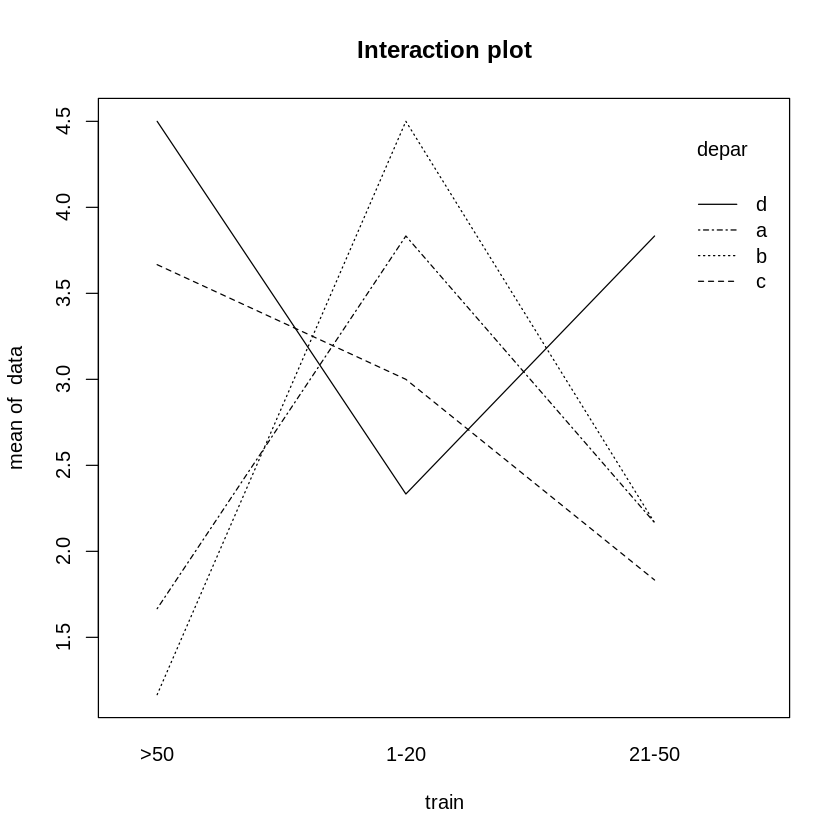

In [27]:
with(data_table,interaction.plot(train,depar,data,fun= mean, main = "Interaction plot"))

In [28]:
TukeyHSD(aov_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data ~ depar * train, data = data_table)

$depar
          diff         lwr      upr     p adj
b-a 0.05555556 -0.95523747 1.066349 0.9987219
c-a 0.27777778 -0.73301525 1.288571 0.8723064
d-a 1.00000000 -0.01079303 2.010793 0.0532315
c-b 0.22222222 -0.78857081 1.233015 0.9290208
d-b 0.94444444 -0.06634859 1.955237 0.0730084
d-c 0.72222222 -0.28857081 1.733015 0.2266365

$train
                 diff        lwr        upr     p adj
1-20->50    0.6666667 -0.1257822  1.4591155 0.1108484
21-50->50  -0.2500000 -1.0424488  0.5424488 0.7139374
21-50-1-20 -0.9166667 -1.7091155 -0.1242178 0.0212277

$`depar:train`
                         diff        lwr         upr     p adj
b:>50-a:>50     -5.000000e-01 -2.7883045  1.78830452 0.9995383
c:>50-a:>50      2.000000e+00 -0.2883045  4.28830452 0.1269887
d:>50-a:>50      2.833333e+00  0.5450288  5.12163786 0.0070701
a:1-20-a:>50     2.166667e+00 -0.1216379  

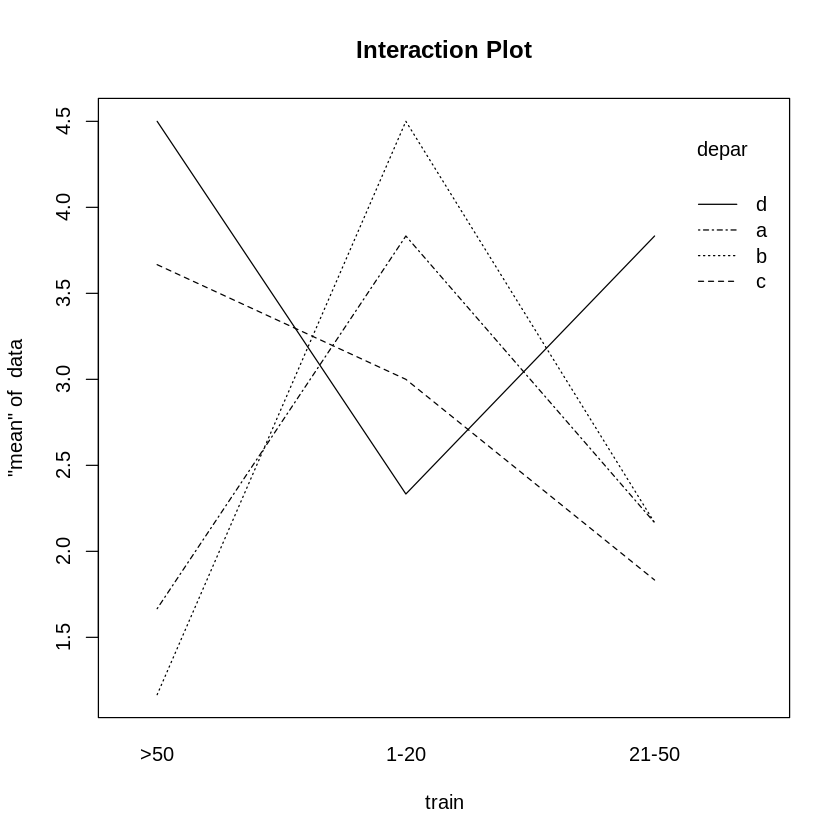

In [33]:
with(data_table,interaction.plot(train,depar,data,fun = "mean", main = "Interaction Plot"))

In [53]:
data <- c(3,4.5,4,5,4.5,4,2.5,3,3.5,2,2,3,2,2.5,2,1,3,2.5,1,3,1.5,5,4,2.5,2.5,1,1.5,0,1.5,2,3.5,3.5,4,4,4.5,5)
depart <- factor(c(rep("a",3),rep("b",3),rep("c",3),rep("d",3)))

train <- factor(c(rep("1-20",12),rep("21-50",12),rep(">50",12)))

data_table <- data.frame(depart , train ,data)

library(car)

leveneTest(data ~  train , data = data_table)

leveneTest(data~ depart , data  = data_table)

aov_model <- aov(data ~ depart * train , data = data_table)

summary(aov_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,2.095238,0.1391093
,33,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,1.101796,0.3627125
,32,NA,NA


             Df Sum Sq Mean Sq F value   Pr(>F)    
depart        3   5.72   1.907   3.157   0.0432 *  
train         2   5.39   2.694   4.460   0.0225 *  
depart:train  6  32.44   5.407   8.950 3.51e-05 ***
Residuals    24  14.50   0.604                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

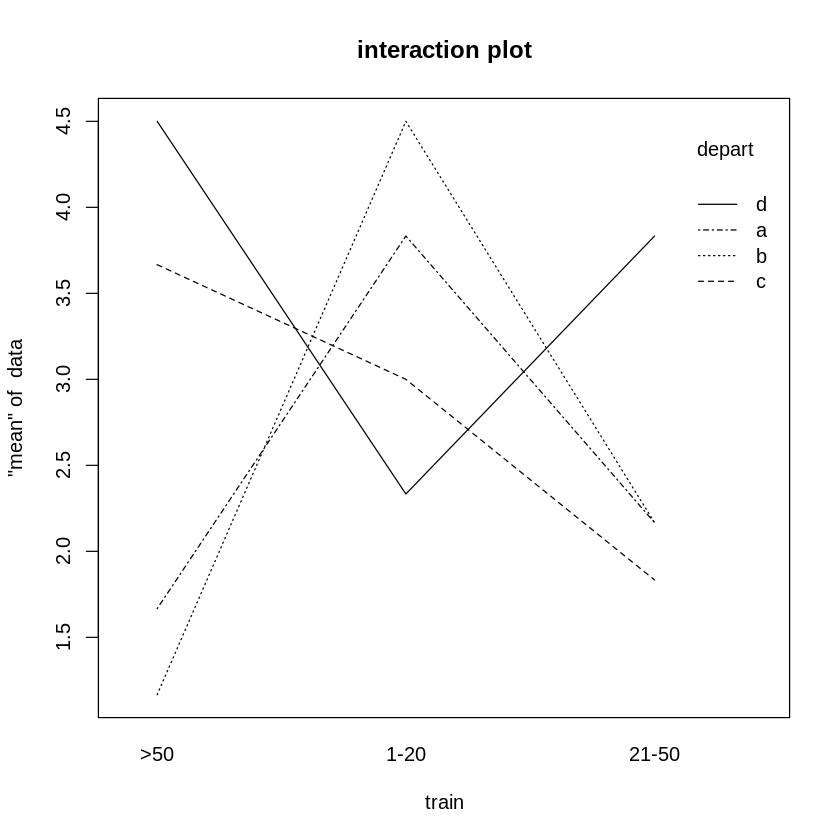

In [57]:
with(data_table,interaction.plot(train,depart,data,fun="mean",main="interaction plot"))

In [60]:
TukeyHSD(aov_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data ~ depart + train, data = data_table)

$depart
          diff        lwr      upr     p adj
b-a 0.05555556 -1.5478814 1.658993 0.9996933
c-a 0.27777778 -1.3256592 1.881215 0.9648510
d-a 1.00000000 -0.6034370 2.603437 0.3435159
c-b 0.22222222 -1.3812148 1.825659 0.9814140
d-b 0.94444444 -0.6589925 2.547881 0.3930143
d-c 0.72222222 -0.8812148 2.325659 0.6163952

$train
                 diff        lwr       upr     p adj
1-20->50    0.6666667 -0.5923184 1.9256517 0.4032627
21-50->50  -0.2500000 -1.5089850 1.0089850 0.8768014
21-50-1-20 -0.9166667 -2.1756517 0.3423184 0.1884588


In [63]:
data <- c(115,98,107,90,85,90,118,105,98,92,95,81,110,102,100,108,115,95,100,105,95,70,85,78,105,95,98,80,68,82,115,98,100,100,99,105,89,100,90,65,80,72,78,85,95,62,70,73,99,102,100,101,95,102)
group <- factor(rep("Treatmemnt",3),rep("Control",3))
data_table <- data.frame(c(data,group))

ERROR: Error in `levels<-`(`*tmp*`, value = as.character(levels)): factor level [2] is duplicated
